In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle

import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams.update({'font.size': 18})

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.8/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [34]:
def get_ps(year):

    vbf = pickle.load(open(str(year)+'/templates.pkl','rb')).integrate('region','signal-vbf').integrate('mjj',overflow='allnan').sum('genflavor','pt1')
    
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    
    hist.plot1d(vbf.integrate('process','VBF_Herwig').integrate('systematic','nominal').integrate('ddb1',int_range=slice(0,0.64)))
    hist.plot1d(vbf.integrate('process','VBF').integrate('systematic','nominal').integrate('ddb1',int_range=slice(0,0.64)))
    hist.plot1d(vbf.integrate('process','VBF').integrate('systematic','UEPS_FSRUp').integrate('ddb1',int_range=slice(0,0.64)))
    hist.plot1d(vbf.integrate('process','VBF').integrate('systematic','UEPS_FSRDown').integrate('ddb1',int_range=slice(0,0.64)))

    plt.legend(title=year,frameon=False,labels=["Herwig","Pythia","Pythia FSR+","Pythia FSR-"])
    
    print(year + ' VBF category')
    
    print("Herwig")
    print(vbf.sum('msd1').integrate('process','VBF_Herwig').integrate('systematic','nominal').integrate('ddb1',int_range=slice(0,0.64)).values())

    print("Pythia nom")
    print(vbf.sum('msd1').integrate('process','VBF').integrate('systematic','nominal').integrate('ddb1',int_range=slice(0,0.64)).values())
    print("Pythia up")
    print(vbf.sum('msd1').integrate('process','VBF').integrate('systematic','UEPS_FSRUp').integrate('ddb1',int_range=slice(0,0.64)).values())
    print("Pythia down")
    print(vbf.sum('msd1').integrate('process','VBF').integrate('systematic','UEPS_FSRDown').integrate('ddb1',int_range=slice(0,0.64)).values())


2016APV VBF category
Herwig
{(): 5.839237610553932}
Pythia nom
{(): 5.614519104601463}
Pythia up
{(): 5.610083515630304}
Pythia down
{(): 5.787356803698503}


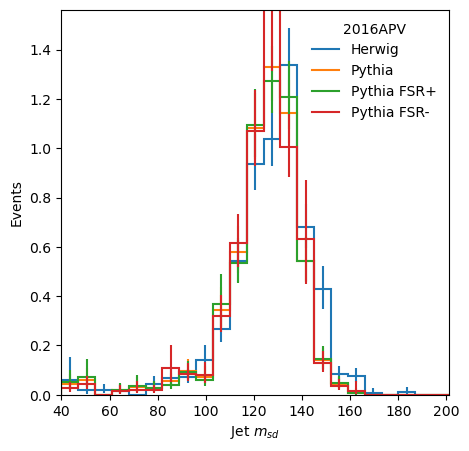

In [35]:
get_ps('2016APV')

2016 VBF category
Herwig
{(): 5.332517439934401}
Pythia nom
{(): 5.0888852309814485}
Pythia up
{(): 5.146636690440998}
Pythia down
{(): 5.0203665364646985}


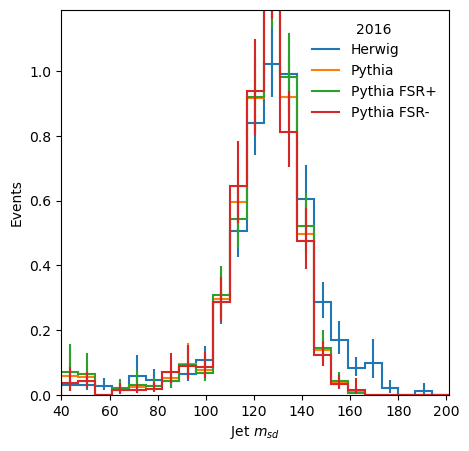

In [36]:
get_ps('2016')

2017 VBF category
Herwig
{(): 12.075861261449644}
Pythia nom
{(): 10.721884856426037}
Pythia up
{(): 11.211736866411652}
Pythia down
{(): 9.839635076530186}


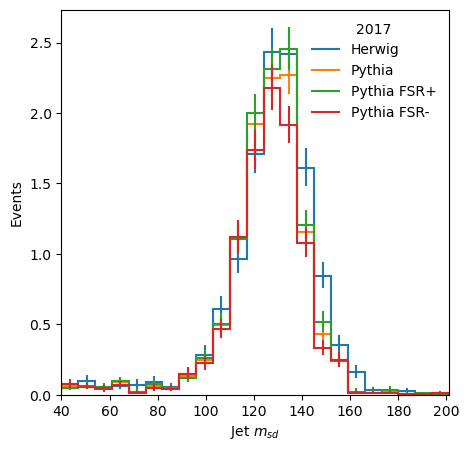

In [37]:
get_ps('2017')

2018 VBF category
Herwig
{(): 19.264148437308137}
Pythia nom
{(): 17.120618893870034}
Pythia up
{(): 17.739140381470456}
Pythia down
{(): 16.047430981376536}


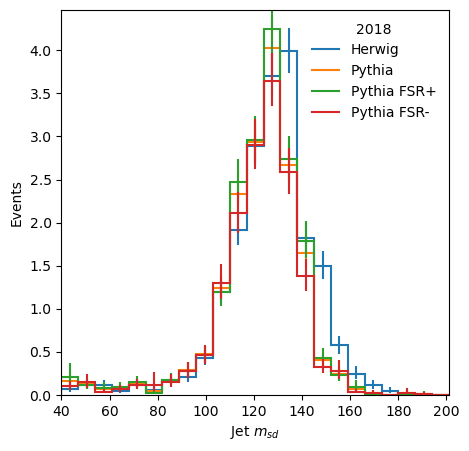

In [38]:
get_ps('2018')

In [39]:
def get_ps_mjj(year):

    vbf = pickle.load(open(str(year)+'/templates.pkl','rb')).integrate('region','signal-vbf').sum('genflavor','pt1','msd1')
    
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    
    hist.plot1d(vbf.integrate('process','VBF_Herwig').integrate('systematic','nominal').integrate('ddb1',int_range=slice(0,0.64)))
    hist.plot1d(vbf.integrate('process','VBF').integrate('systematic','nominal').integrate('ddb1',int_range=slice(0,0.64)))
    hist.plot1d(vbf.integrate('process','VBF').integrate('systematic','UEPS_FSRUp').integrate('ddb1',int_range=slice(0,0.64)))
    hist.plot1d(vbf.integrate('process','VBF').integrate('systematic','UEPS_FSRDown').integrate('ddb1',int_range=slice(0,0.64)))

    plt.legend(title=year,frameon=False,labels=["Herwig","Pythia","Pythia FSR+","Pythia FSR-"],loc='lower left')
     
    print(year + ' VBF category')
    
    print("Herwig")
    print(vbf.integrate('process','VBF_Herwig').integrate('systematic','nominal').integrate('ddb1',int_range=slice(0,0.64)).values())

    print("Pythia nom")
    print(vbf.integrate('process','VBF').integrate('systematic','nominal').integrate('ddb1',int_range=slice(0,0.64)).values())
    print("Pythia up")
    print(vbf.integrate('process','VBF').integrate('systematic','UEPS_FSRUp').integrate('ddb1',int_range=slice(0,0.64)).values())
    print("Pythia down")
    print(vbf.integrate('process','VBF').integrate('systematic','UEPS_FSRDown').integrate('ddb1',int_range=slice(0,0.64)).values())


2016APV VBF category
Herwig
{(): array([3.04256996, 2.79666765])}
Pythia nom
{(): array([2.77456161, 2.8399575 ])}
Pythia up
{(): array([2.73764675, 2.87243676])}
Pythia down
{(): array([2.9541615 , 2.83319531])}


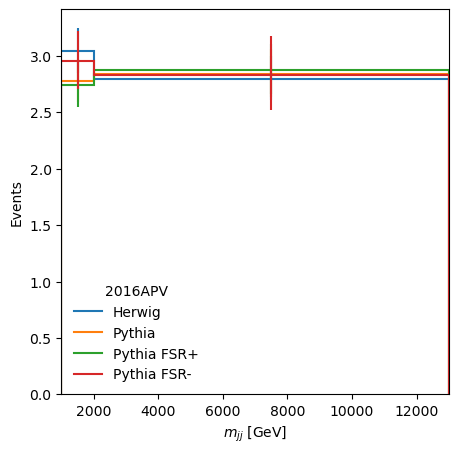

In [40]:
get_ps_mjj('2016APV')

2016 VBF category
Herwig
{(): array([3.06028453, 2.27223291])}
Pythia nom
{(): array([2.62299782, 2.46588741])}
Pythia up
{(): array([2.60386298, 2.54277371])}
Pythia down
{(): array([2.75081662, 2.26954992])}


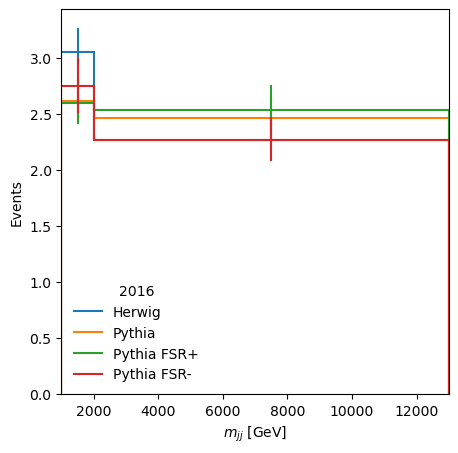

In [41]:
get_ps_mjj('2016')

2017 VBF category
Herwig
{(): array([6.39530189, 5.68055937])}
Pythia nom
{(): array([5.63173234, 5.09015251])}
Pythia up
{(): array([5.86336341, 5.34837346])}
Pythia down
{(): array([5.20416906, 4.63546602])}


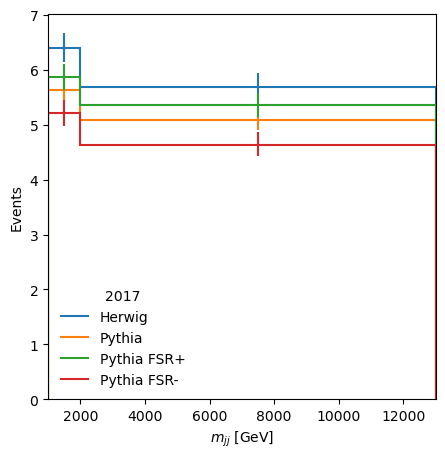

In [42]:
get_ps_mjj('2017')

2018 VBF category
Herwig
{(): array([10.23234065,  9.03180779])}
Pythia nom
{(): array([8.49775483, 8.62286407])}
Pythia up
{(): array([8.75773012, 8.98141026])}
Pythia down
{(): array([8.05580297, 7.99162801])}


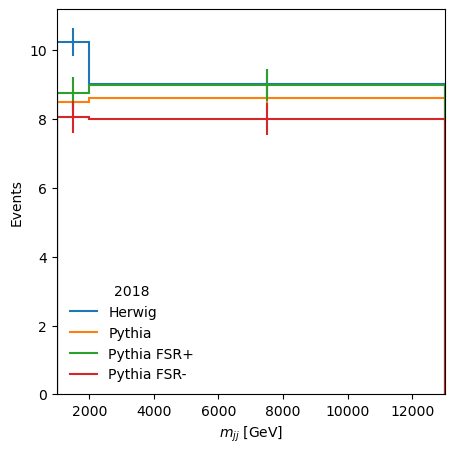

In [43]:
get_ps_mjj('2018')